In [ ]:
#STA365 Kaiyi Zhang

In [ ]:
Given that there are three bandits, red, blue and others, with respectively $\theta_A$, $\theta_B$ and $\theta_C$ 
to win. 
Assume $\theta_A$, $\theta_B$ and $\theta_C$ are 0.3, 0.5, 0.7.


In [ ]:
Firstly, we need to find which one has the large probability to win, without knowing the exact value of $\theta$.

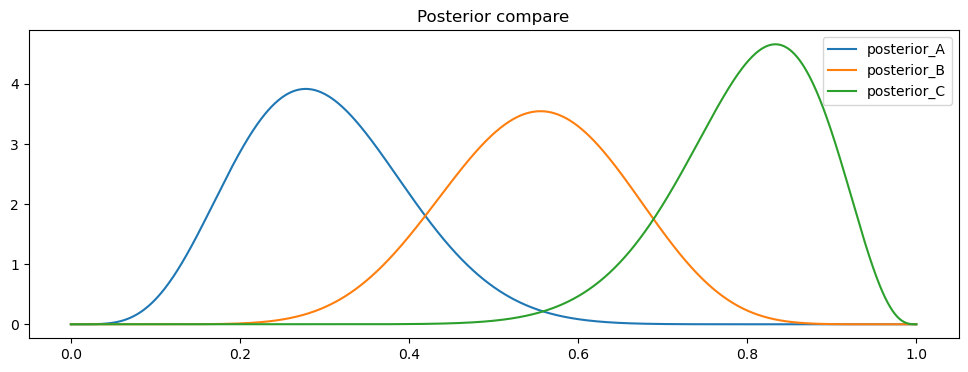

In [27]:
#bandit A with $\theta_A = 0.3$
from scipy import stats
import numpy as np
np.random.seed(88)

alpha_A, beta_A, n_A, x_A = 1, 1, 0, 0
for i in range(20):
    if stats.binom(n=1,p=0.3).rvs(size=1) == 1:
        x_A += 1
    n_A += 1

#update the alpha and beta after 100 times try.
alpha_Aup = x_A + alpha_A - 1
beta_Aup = n_A - x_A + beta_A - 1

#similarly to B(p=0.5) and C(p=0.7)

from scipy import stats
alpha_B, beta_B, n_B, x_B = 1, 1, 0, 0
for i in range(20):
    if stats.binom(n=1,p=0.5).rvs(size=1) == 1:
        x_B += 1
    n_B += 1

alpha_Bup = x_B + alpha_B - 1
beta_Bup = n_B - x_B + beta_B - 1

from scipy import stats
alpha_C, beta_C, n_C, x_C = 1, 1, 0, 0
for i in range(20):
    if stats.binom(n=1,p=0.7).rvs(size=1) == 1:
        x_C += 1
    n_C += 1

alpha_Cup = x_C + alpha_C - 1
beta_Cup = n_C - x_C + beta_C - 1

#Now we will use the updated alpha and beta to get the posterior and draw a graph (refer in class code)
#Since we want to know which one has the maximum probabity to win, thus we only need the posterior to compare

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
parameter_domain = np.linspace(0,1,1000)
#likelihood = stats.binom.pmf(n=n, k=x, p=parameter_domain)
#prior = stats.beta(a=alpha,b=beta).pdf(parameter_domain)
post_A = stats.beta(a=alpha_Aup, b=beta_Aup).pdf(parameter_domain)
post_B = stats.beta(a=alpha_Bup, b=beta_Bup).pdf(parameter_domain)
post_C = stats.beta(a=alpha_Cup, b=beta_Cup).pdf(parameter_domain)

plt.figure(figsize=(12,4))

plt.plot(parameter_domain, post_A, label="posterior_A")
plt.plot(parameter_domain, post_B, label="posterior_B")
plt.plot(parameter_domain, post_C, label="posterior_C")


plt.legend() 
plt.title("Posterior compare")
plt.show()

In [ ]:
#Based on the graph we get above, the green line, which is the line represents posterior C are 
#distributed mainly in higher probability above 0.8. And have heavier density in the peak.

#Therefore, based on our simulation, I will recommand to choose C.